## Machine Learning Foundations
# Feature Engineering
Sumudu Tennakoon, PhD

<hr>

To learn more about Python, refeer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

Dataset used in this tutorial
* Census Income Data (income_data.csv): http://archive.ics.uci.edu/ml/datasets/Census+Income

# Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data

## Mount Google Drive

In [ ]:
# Run only if you use google Colab

from google.colab import drive
drive.mount('/content/drive')

## Read CSV file from a Given Path

In [2]:
# From URL (GitHub raw file link)
file_path_url= 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# From Colab Workspace (need to upload the file first. File will get deleted when this runtime is recycled)
file_path_ws = '/content/income_data.csv' 

# FromGoogle Drive
file_path_gd = '/content/drive/MyDrive/Classroom/Data Science Foundations/income_data.csv'

# Load CSV File
census_data = pd.read_csv(file_path_url)
census_data.head(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Inspect the Loaded Dataset: Preview a random sample of rows

In [3]:
census_data.sample(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
4925,4926,29,Private,119170,Some-college,10,Separated,Tech-support,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
18694,18703,73,Federal-gov,127858,Some-college,10,Widowed,Tech-support,Not-in-family,White,Female,3273.0,0.0,40.0,United-States,<=50K
10636,10639,62,Private,35783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
13278,13283,46,Private,369538,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
34875,10057,33,Private,227026,Bachelors,13,Never-married,Craft-repair,Unmarried,White,Female,0.0,0.0,40.0,Nicaragua,<=50K.


# 2. Pre-Processing Tasks

In [4]:
# Drop unwanted column
census_data.drop(labels='Unnamed: 0', axis=1, inplace=True)

# Drop rows with missing values
census_data.dropna(how='any', axis=0, inplace=True)

# Remove leading and trailing spaces in string values
def remove_spaces(data, columns):
    for column in columns:
        data[column] = data[column].str.strip()
    return data

columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'class']
census_data = remove_spaces(census_data, columns)

# Resolve duplicate representation in 'class' column
census_data['class'].replace('>50K.', '>50K', inplace=True)
census_data['class'].replace('<=50K.', '<=50K', inplace=True)

# Convert 'class' column to Binary Column
# "<=50K" -> 0
# ">50K"  -> 1
census_data['earn_gt_50K'] = np.where(census_data['class']=='>50K',1,0)

# Create Unique ID for Each Row
census_data['ID'] = census_data.index+1

# Rearrange Columns 
census_data = census_data[['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'earn_gt_50K']]

# Optimize Memory Usage
census_data['age'] = census_data['age'].astype('int8')
census_data['education_num'] = census_data['education_num'].astype('int8')
census_data['hours_per_week'] = census_data['hours_per_week'].astype('float32')
census_data['capital_gain'] = census_data['capital_gain'].astype('float32')
census_data['capital_loss'] = census_data['capital_loss'].astype('float32')

census_data['workclass'] = census_data['workclass'].astype('category')
census_data['education'] = census_data['education'].astype('category')
census_data['marital_status'] = census_data['marital_status'].astype('category')
census_data['education'] = census_data['education'].astype('category')
census_data['occupation'] = census_data['occupation'].astype('category')
census_data['relationship'] = census_data['relationship'].astype('category')
census_data['race'] = census_data['race'].astype('category')
census_data['sex'] = census_data['sex'].astype('category')
census_data['native_country'] = census_data['native_country'].astype('category')


# save as picke file (binary)
census_data.to_pickle('income_data_cleaned.pkl')

# Save as .csv
census_data.to_csv('income_data_cleaned.csv', index=False)

census_data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,earn_gt_50K
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0


## Load Previously Saved Processed File
### Skip Steps 1 & 2 if the Processed Data is saved when executing Exploratory Data Analysis Notebook 

In [5]:
census_data = pd.read_pickle('income_data_processed.pkl')
census_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'income_data_processed.pkl'

In [ ]:
census_data.head().values

# 2. Explore Metadata

## Data Frame `info()` Function (Row count, Columns, Non-Null Count, Data Types)

In [ ]:
census_data.info()

# 3. Descriptive Statistics

## Descriptive Statistics for all columns

In [ ]:
census_data.describe(include='all').transpose()

# X. Formulate Machine Learning Problem

- Feature (X) = ?
- Target (y) = ?
- Machine Learning Problem Type = ?

In [6]:
X = []

y = ''

# 4. Prepare Numerical Features

## 4.1 Transform Numerical Columns into Categorical Columns

### age

<AxesSubplot:>

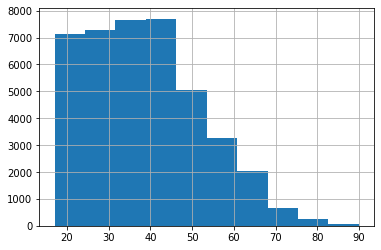

In [7]:
census_data['age'].hist()

In [8]:
census_data['age'].describe()

count    41094.000000
mean        38.669757
std         13.748166
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [9]:
# Use value_counts() get freqeuncy table after grouping into buackets
census_data['age'].value_counts(bins=10,sort=False)

(16.926, 24.3]    7115
(24.3, 31.6]      7271
(31.6, 38.9]      7665
(38.9, 46.2]      7700
(46.2, 53.5]      5031
(53.5, 60.8]      3266
(60.8, 68.1]      2040
(68.1, 75.4]       668
(75.4, 82.7]       253
(82.7, 90.0]        85
Name: age, dtype: int64

In [10]:
census_data['age'].value_counts(bins=10, normalize=True,sort=False)

(16.926, 24.3]    0.173140
(24.3, 31.6]      0.176936
(31.6, 38.9]      0.186524
(38.9, 46.2]      0.187375
(46.2, 53.5]      0.122427
(53.5, 60.8]      0.079476
(60.8, 68.1]      0.049642
(68.1, 75.4]      0.016255
(75.4, 82.7]      0.006157
(82.7, 90.0]      0.002068
Name: age, dtype: float64

## Use of `cut()` function to create buckets based on custome ranges 

In [11]:
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '>60']
bin_edges = [0, 20, 30, 40, 50, 60, np.inf]

In [12]:
len(labels)

6

In [13]:
len(bin_edges)

7

In [14]:
# Create bucket variable
census_data['age_group'] = pd.cut(x=census_data['age'], bins=bin_edges, labels=labels)

In [15]:
census_data[['age', 'age_group']].sample(10)

,age,age_group
6943,31,30-40
7457,40,30-40
22588,20,<20
11524,52,50-60
3490,69,>60
12206,33,30-40
32347,65,>60
38632,52,50-60
1061,61,>60
27665,39,30-40


In [16]:
census_data.groupby(by=['class', 'earn_gt_50K']).agg({'age': ['min', 'max', 'mean', 'std']})

age                          
                  min max       mean        std
class earn_gt_50K                              
<=50K 0            17  90  36.921302  14.157086
>50K  1            19  90  44.255282  10.564443

In [17]:
census_data.groupby(by=['age_group']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

In [18]:
pd.crosstab(census_data['age_group'], census_data['earn_gt_50K']).style.background_gradient().set_precision(3)

<ipython-input-18-3d816847d102>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.crosstab(census_data['age_group'], census_data['earn_gt_50K']).style.background_gradient().set_precision(3)


earn_gt_50K,0,1
age_group,,
<20,3037,4
20-30,9409,817
30-40,7773,3046
40-50,5406,3335
50-60,3340,1881
>60,2332,714


In [19]:
pd.crosstab(census_data['age_group'], census_data['earn_gt_50K'], normalize=True).style.background_gradient().set_precision(3)

<ipython-input-19-e060acaeefc0>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.crosstab(census_data['age_group'], census_data['earn_gt_50K'], normalize=True).style.background_gradient().set_precision(3)


earn_gt_50K,0,1
age_group,,
<20,0.074,0.000
20-30,0.229,0.020
30-40,0.189,0.074
40-50,0.132,0.081
50-60,0.081,0.046
>60,0.057,0.017


In [20]:
def numeric_to_categorical(data, column, bin_edges, labels):
    data[F'{column}_group'] = pd.cut(x=data[column], bins=bin_edges, labels=labels)
    return data

## Exercise 1
Convert `hours_per_week` into categorical variable 

In [21]:
census_data['hours_per_week'].describe()

count    41094.000000
mean        40.404583
std         12.371882
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [22]:
census_data['hours_per_week'].value_counts(bins=10, sort=False)

(0.901, 10.8]      947
(10.8, 20.6]      2801
(20.6, 30.4]      2869
(30.4, 40.2]     22441
(40.2, 50.0]      7481
(50.0, 59.8]      1307
(59.8, 69.6]      2239
(69.6, 79.4]       569
(79.4, 89.2]       267
(89.2, 99.0]       173
Name: hours_per_week, dtype: int64

In [23]:
# Type your code here

<AxesSubplot:>

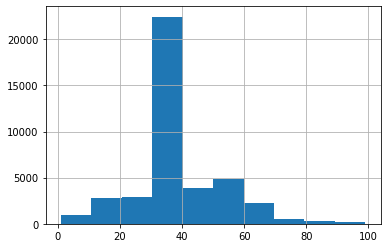

In [24]:
census_data['hours_per_week'].hist()

In [25]:
labels = ['<25', '20-35', '35-45', '45-60', '>60']
bin_edges = [0, 20, 35, 45, 60, np.inf]

census_data['hours_per_week_group'] = pd.cut(x=census_data['hours_per_week'], bins=bin_edges, labels=labels)

census_data.groupby(by=['hours_per_week_group']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

## 4.2 Scale Numeric Variables

<AxesSubplot:>

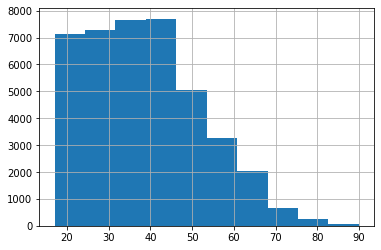

In [26]:
census_data['age'].hist()

### Min-Max Scalar

In [27]:
max_value = census_data['age'].max()
min_value = census_data['age'].min()
census_data['age_scaled'] = (census_data['age']-min_value)/(max_value-min_value)
census_data[['age', 'age_scaled']].sample(5)

,age,age_scaled
10204,45,0.383562
25564,40,0.315068
28500,18,0.013699
33227,42,0.342466
36525,62,0.616438


<AxesSubplot:xlabel='age'>

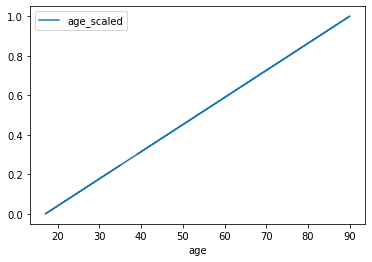

In [28]:
census_data.plot(x='age', y='age_scaled')

<AxesSubplot:>

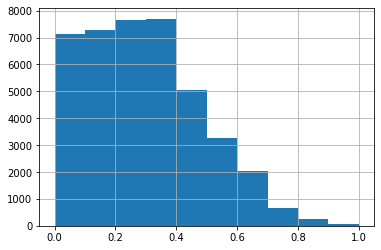

In [29]:
census_data['age_scaled'].hist()

In [30]:
def min_max_scalar(data, column):
    max_value = data[column].max()
    min_value = data[column].min()
    data[f'{column}_scaled'] = (data[column]-min_value)/(max_value-min_value)
    return data

### Standardization (Z-Score)

In [31]:
mean = census_data['age'].mean()
std = census_data['age'].std()
census_data['age_zscore'] = (census_data['age']-mean)/std
census_data[['age', 'age_zscore']].sample(5)

,age,age_zscore
18806,35,-0.266927
9574,35,-0.266927
30428,38,-0.048716
25580,48,0.678654
7073,28,-0.776086


<AxesSubplot:xlabel='age'>

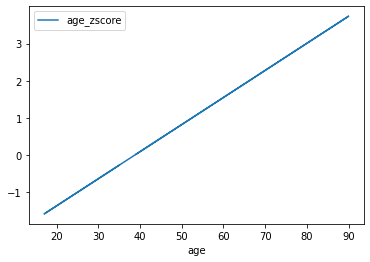

In [32]:
census_data.plot(x='age', y='age_zscore')

<AxesSubplot:>

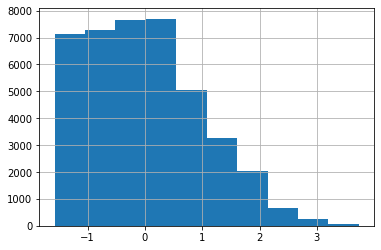

In [33]:
census_data['age_zscore'].hist()

In [34]:
def z_score(data, column):
    mean = data[column].mean()
    std = data[column].std()
    data[f'{column}_zscore'] = (data[column]-mean)/std
    return data

# 5. Prepare Categorical Features

## 5.1 Combine Values of Categorical Variables (Reduce Number of Categories)

In [35]:
census_data['education'].describe()

count       41094
unique         16
top       HS-grad
freq        13345
Name: education, dtype: object

In [36]:
census_data['education'].unique()

['Bachelors', 'HS-grad', '11th', 'Masters', '9th', ..., '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

In [37]:
census_data['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int8)

### Method 1: Use Loc

In [38]:
census_data['education_group'] = None
census_data.loc[census_data['education']=='Preschool', 'education_group'] = 'school'
census_data.loc[census_data['education']=='5th-6th', 'education_group'] = 'school'
census_data.loc[census_data['education']=='1st-4th', 'education_group'] = 'school'
census_data.loc[census_data['education']=='7th-8th', 'education_group'] = 'school'
census_data.loc[census_data['education']=='9th', 'education_group'] = 'school'

census_data.loc[census_data['education']=='Some-college', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Assoc-voc', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Assoc-acdm', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Doctorate', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Prof-school', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Bachelors', 'education_group'] = 'university'
#census_data.loc[census_data['education']=='HS-grad', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Masters', 'education_group'] = 'university'

census_data.loc[census_data['education']=='10th', 'education_group'] = 'h. school'
census_data.loc[census_data['education']=='11th', 'education_group'] = 'h. school'
census_data.loc[census_data['education']=='12th', 'education_group'] = 'h. school'

# Check if the above code produced the desired output !

In [39]:
census_data['education_group'].unique()

array(['university', None, 'h. school', 'school'], dtype=object)

In [40]:
census_data.loc[census_data['education_group'].isna()]

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,class,earn_gt_50K,age_group,hours_per_week_group,age_scaled,age_zscore,education_group
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,40.0,United-States,<=50K,0,30-40,35-45,0.287671,-0.048716,None
7,8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,45.0,United-States,>50K,1,50-60,35-45,0.479452,0.969602,None
16,17,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,...,0.0,35.0,United-States,<=50K,0,20-30,20-35,0.109589,-0.994297,None
17,18,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,...,0.0,40.0,United-States,<=50K,0,30-40,35-45,0.205479,-0.485138,None
21,22,54,Private,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,...,0.0,20.0,United-States,<=50K,0,50-60,<25,0.506849,1.115075,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41084,41085,48,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,...,0.0,40.0,United-States,<=50K,0,40-50,35-45,0.424658,0.678654,None
41085,41086,61,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,0.0,48.0,United-States,<=50K,0,>60,45-60,0.602740,1.624234,None
41086,41087,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,...,0.0,40.0,United-States,<=50K,0,30-40,35-45,0.191781,-0.557875,None
41087,41088,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,...,0.0,40.0,United-States,<=50K,0,20-30,35-45,0.109589,-0.994297,None


In [41]:
pd.crosstab(census_data['education_group'], census_data['earn_gt_50K'], margins=True, margins_name='Total')

earn_gt_50K,0,1,Total
education_group,,,
h. school,3055,201,3256
school,1992,116,2108
university,15023,7362,22385
Total,20070,7679,27749


### Method 2: Apply Custom Functions over Data Frames

In [42]:
def merge_education_catergory(education):
  if education in ('Preschool', '1st-4th', '5th-6th', '7th-8th', '9th'):
    return 'school'
  elif education in ('10th', '11th', '12th'):
    return 'h. school'
  elif education in ('Bachelors', 'Masters', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school', 'HS-grad'):
    return 'university'

print(f"merge_education_catergory('12th') = '{merge_education_catergory('12th')}'")
print(f"merge_education_catergory('Masters') = '{merge_education_catergory('Masters')}'")

merge_education_catergory('12th') = 'h. school'
merge_education_catergory('Masters') = 'university'


In [43]:
census_data['education_group2'] = census_data['education'].apply(merge_education_catergory)
pd.crosstab(census_data['education_group2'], census_data['earn_gt_50K'], margins=True, margins_name='Total')

earn_gt_50K,0,1,Total
education_group2,,,
h. school,3055,201,3256
school,1992,116,2108
university,26250,9480,35730
Total,31297,9797,41094


### Method 3: Use String Matching (RegEx)

In [44]:
census_data.loc[census_data['education'].str.match('(Preschool|1st-4th|5th-6th|7th-8th|9th)'), 'education_group3'] = 'school'
census_data.loc[census_data['education'].str.match('(10th|11th|12th|HS-grad)'), 'education_group3'] = 'h. school'
census_data.loc[census_data['education'].str.match('(Bachelors|Masters|Some-college|Assoc-acdm|Assoc-voc|Doctorate|Prof-school)'), 'education_group3'] = 'university'
pd.crosstab(census_data['education_group3'], census_data['earn_gt_50K'], margins=True, margins_name='Total')

earn_gt_50K,0,1,Total
education_group3,,,
h. school,14282,2319,16601
school,1992,116,2108
university,15023,7362,22385
Total,31297,9797,41094


### Method 4: Use replace({})

In [45]:
# Replace single category/text
census_data['education_group4'] = census_data['education'].replace('Preschool', 'school')

In [46]:
update_dict = {
    'Preschool':'school', '1st-4th':'school', '5th-6th':'school', '7th-8th':'school', '9th':'school',
    '10th':'h. school', '11th':'h. school', '12th':'h. school', 'HS-grad':'university',
    'Some-college':'university', 'Assoc-acdm':'university', 'Assoc-voc':'university', 
    'Bachelors':'university', 'Masters':'university', 'Doctorate':'university', 'Prof-school':'university'
}

census_data['education_group4'] = census_data['education'].replace(update_dict)
pd.crosstab(census_data['education_group4'], census_data['earn_gt_50K'], margins=True, margins_name='Total')

# Check if the above code produced the desired output !

earn_gt_50K,0,1,Total
education_group4,,,
h. school,3055,201,3256
university,26250,9480,35730
school,1992,116,2108
Total,31297,9797,41094


In [47]:
census_data['education_group'] = census_data['education_group3'] 
pd.crosstab(census_data['education_group'], census_data['earn_gt_50K'], margins=True, margins_name='Total')

earn_gt_50K,0,1,Total
education_group,,,
h. school,14282,2319,16601
school,1992,116,2108
university,15023,7362,22385
Total,31297,9797,41094


## 5.2 Encoding (Category to Number)

#### sex: binary encoding

In [48]:
census_data['sex'].value_counts()

Male      27446
Female    13648
Name: sex, dtype: int64

In [49]:
census_data['is_male'] = np.where(census_data['sex']=='Male', 1,0)

census_data.groupby(by=['sex', 'is_male']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

#### workclass: numeric value ranked by the response rate

In [50]:
census_data.groupby(by=['workclass']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [51]:
census_data['workclass'].unique()

['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [52]:
census_data['workclass_group'] = census_data['workclass'].replace({'?':'Other', 'Without-pay':'Other', 'Never-worked':'Other', 'Local-gov':'Local-State-gov', 'State-gov':'Local-State-gov'})
census_data.groupby(by=['workclass_group']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [53]:
census_data['workclass_group'].unique()

['Local-State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Other', 'Self-emp-inc']
Categories (6, object): ['Other', 'Federal-gov', 'Local-State-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc']

In [54]:
census_data['workclass_num'] = census_data['workclass_group'].replace({'Other':1, 'Private':2, 'Self-emp-not-inc':3, 'Local-State-gov':4, 'Federal-gov':5, 'Self-emp-inc':6})

census_data.groupby(by=['workclass_num']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

In [55]:
census_data['workclass_num'].dtype

CategoricalDtype(categories=[1, 5, 4, 2, 6, 3], ordered=False)

In [56]:
# Convert encoded column to int
census_data['workclass_num'] = census_data['workclass_group'].replace({'Other':1, 'Private':2, 'Self-emp-not-inc':3, 'Local-State-gov':4, 'Federal-gov':5, 'Self-emp-inc':6}).astype('int')

census_data.groupby(by=['workclass_num']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

In [57]:
census_data['workclass_num'].dtype

dtype('int32')

#### marital_status: 

In [58]:
census_data.groupby(by=['marital_status']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [59]:
census_data['marital_status_group'] = census_data['marital_status'].replace({'Divorced':'Divorced-Separated-Widowed-Absent', 'Separated':'Divorced-Separated-Widowed-Absent', 'Widowed':'Divorced-Separated-Widowed-Absent', 
                                    'Married-spouse-absent':'Divorced-Separated-Widowed-Absent',
                                    'Married-civ-spouse':'Married-civ-AF-spouse', 'Married-AF-spouse':'Married-civ-AF-spouse'})
census_data.groupby(by=['marital_status_group']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [60]:
census_data['marital_status_num'] = census_data['marital_status_group'].replace({'Never-married':1, 'Divorced-Separated-Widowed-Absent':2, 'Married-civ-AF-spouse':3}).astype('int')
census_data.groupby(by=['marital_status_num']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()


#### occupation

In [61]:
census_data.groupby(by=['occupation']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [62]:
census_data['occupation_group'] = census_data['occupation'].replace({'Prof-specialty':'Exec-managerial-Prof-specialty', 'Exec-managerial':'Exec-managerial-Prof-specialty', 
                                                                        'Protective-serv':'Armed-Forces-Protective-serv', 'Armed-Forces':'Armed-Forces-Protective-serv',
                                                                        'Priv-house-serv':'Priv-house-serv-Handlers-cleaners-Other', 'Handlers-cleaners':'Priv-house-serv-Handlers-cleaners-Other', 
                                                                        'Other-service':'Priv-house-serv-Handlers-cleaners-Other', '?':'Priv-house-serv-Handlers-cleaners-Other',
                                                                        'Farming-fishing':'Farming-fishing-Machine-op-inspct', 'Machine-op-inspct':'Farming-fishing-Machine-op-inspct',
                                                                        })
census_data.groupby(by=['occupation_group']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [63]:
census_data['occupation_num'] = census_data['occupation_group'].replace({'Priv-house-serv-Handlers-cleaners-Other':1, 'Farming-fishing-Machine-op-inspct':2, 
                                                                                'Adm-clerical':3, 'Transport-moving':4,'Craft-repair':5, 'Sales':6, 'Tech-support':7,
                                                                                'Armed-Forces-Protective-serv':8, 'Exec-managerial-Prof-specialty':9}).astype('int')

census_data.groupby(by=['occupation_num']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

#### race

In [64]:
census_data.groupby(by=['race']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [65]:
census_data['race_group'] = census_data['race'].replace({'Other':'Amer-Indian-Eskimo-Other', 'Amer-Indian-Eskimo':'Amer-Indian-Eskimo-Other'})
census_data.groupby(by=['race_group']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [66]:
census_data['race_num'] = census_data['race_group'].replace({'Amer-Indian-Eskimo-Other':1, 'Black':2, 'White':3, 'Asian-Pac-Islander':4}).astype('int')

census_data.groupby(by=['race_num']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

#### relationship

In [67]:
census_data.groupby(by=['relationship']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).sort_values(by=('earn_gt_50K',  'mean')).style.background_gradient()

In [68]:
census_data['relationship_num'] = census_data['relationship'].replace({'Own-child':1, 'Other-relative':2, 'Unmarried':3, 'Not-in-family':4, 'Husband':5, 'Wife':6}).astype('int')

census_data.groupby(by=['relationship_num']).agg({'earn_gt_50K': ['mean', 'std', 'count']}).style.background_gradient()

## 5.3 One-hot Encode Categorical Columns

### Get Dummies

In [69]:
categorical_columns = ['workclass_group', 'marital_status_group', 'occupation_group', 'relationship', 'race_group', 'is_male', 'age_group', 'hours_per_week_group', 'education_group']

dummy_columns = pd.get_dummies(census_data[categorical_columns], drop_first=True)
dummy_columns


,is_male,workclass_group_Federal-gov,workclass_group_Local-State-gov,workclass_group_Private,workclass_group_Self-emp-inc,workclass_group_Self-emp-not-inc,marital_status_group_Married-civ-AF-spouse,marital_status_group_Never-married,occupation_group_Craft-repair,occupation_group_Farming-fishing-Machine-op-inspct,...,age_group_30-40,age_group_40-50,age_group_50-60,age_group_>60,hours_per_week_group_20-35,hours_per_week_group_35-45,hours_per_week_group_45-60,hours_per_week_group_>60,education_group_school,education_group_university
0,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41090,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
41091,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
41092,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
41093,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


### Combine Dummy Columns with the Dataset


In [70]:
census_data_one_hot = pd.concat([census_data[['ID', 'class', 'earn_gt_50K']], dummy_columns], axis=1)
census_data_one_hot

,ID,class,earn_gt_50K,is_male,workclass_group_Federal-gov,workclass_group_Local-State-gov,workclass_group_Private,workclass_group_Self-emp-inc,workclass_group_Self-emp-not-inc,marital_status_group_Married-civ-AF-spouse,...,age_group_30-40,age_group_40-50,age_group_50-60,age_group_>60,hours_per_week_group_20-35,hours_per_week_group_35-45,hours_per_week_group_45-60,hours_per_week_group_>60,education_group_school,education_group_university
0,1,<=50K,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,2,<=50K,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,3,<=50K,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,4,<=50K,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,5,<=50K,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41090,41091,<=50K,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
41091,41092,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
41092,41093,<=50K,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
41093,41094,<=50K,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [71]:
one_hot_categorical_columns_to_model = dummy_columns.columns.to_list()
one_hot_categorical_columns_to_model

['is_male',
 'workclass_group_Federal-gov',
 'workclass_group_Local-State-gov',
 'workclass_group_Private',
 'workclass_group_Self-emp-inc',
 'workclass_group_Self-emp-not-inc',
 'marital_status_group_Married-civ-AF-spouse',
 'marital_status_group_Never-married',
 'occupation_group_Craft-repair',
 'occupation_group_Farming-fishing-Machine-op-inspct',
 'occupation_group_Priv-house-serv-Handlers-cleaners-Other',
 'occupation_group_Exec-managerial-Prof-specialty',
 'occupation_group_Armed-Forces-Protective-serv',
 'occupation_group_Sales',
 'occupation_group_Tech-support',
 'occupation_group_Transport-moving',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_group_Black',
 'race_group_Amer-Indian-Eskimo-Other',
 'race_group_White',
 'age_group_20-30',
 'age_group_30-40',
 'age_group_40-50',
 'age_group_50-60',
 'age_group_>60',
 'hours_per_week_group_20-35',
 'hours_per_week_group_35-45',
 'ho

In [72]:
def one_hot_encode(data, columns_to_keep, columns_to_one_hot):
    dummy_columns = pd.get_dummies(census_data[columns_to_one_hot], drop_first=True)
    data_one_hot = pd.concat([data[columns_to_keep], dummy_columns], axis=1)
    one_hot_columns = dummy_columns.columns
    return data_one_hot, one_hot_columns

# 6. Check Correlation Between Featurs and Target Variable

## 6.1 Correlation Between Numeric Features and the Target

In [73]:
numeric_colums_to_model = ['age', 'education_num', 'hours_per_week', 'marital_status_num', 'relationship_num', 'is_male', 'race_num', 'workclass_num', 'occupation_num', 'earn_gt_50K']

correlation_matrix = census_data[numeric_colums_to_model].corr()
correlation_matrix

,age,education_num,hours_per_week,marital_status_num,relationship_num,is_male,race_num,workclass_num,occupation_num,earn_gt_50K
age,1.000000,0.027157,0.072075,0.465809,0.433019,0.085789,0.030159,0.153502,0.110919,0.227311
education_num,0.027157,1.000000,0.141754,0.057904,0.135627,0.010553,0.105803,0.184427,0.479689,0.331170
hours_per_week,0.072075,0.141754,1.000000,0.227980,0.264144,0.229660,0.033119,0.149276,0.213757,0.225930
marital_status_num,0.465809,0.057904,0.227980,1.000000,0.749472,0.334505,0.089629,0.145200,0.175743,0.423020
relationship_num,0.433019,0.135627,0.264144,0.749472,1.000000,0.252231,0.075393,0.146838,0.225648,0.382134
is_male,0.085789,0.010553,0.229660,0.334505,0.252231,1.000000,0.083973,0.073730,0.096997,0.214958
race_num,0.030159,0.105803,0.033119,0.089629,0.075393,0.083973,1.000000,0.006013,0.092736,0.089083
workclass_num,0.153502,0.184427,0.149276,0.145200,0.146838,0.073730,0.006013,1.000000,0.292769,0.170475
occupation_num,0.110919,0.479689,0.213757,0.175743,0.225648,0.096997,0.092736,0.292769,1.000000,0.342933
earn_gt_50K,0.227311,0.331170,0.225930,0.423020,0.382134,0.214958,0.089083,0.170475,0.342933,1.000000


In [74]:
correlation_matrix.style.background_gradient()

,age,education_num,hours_per_week,marital_status_num,relationship_num,is_male,race_num,workclass_num,occupation_num,earn_gt_50K
age,1.000000,0.027157,0.072075,0.465809,0.433019,0.085789,0.030159,0.153502,0.110919,0.227311
education_num,0.027157,1.000000,0.141754,0.057904,0.135627,0.010553,0.105803,0.184427,0.479689,0.331170
hours_per_week,0.072075,0.141754,1.000000,0.227980,0.264144,0.229660,0.033119,0.149276,0.213757,0.225930
marital_status_num,0.465809,0.057904,0.227980,1.000000,0.749472,0.334505,0.089629,0.145200,0.175743,0.423020
relationship_num,0.433019,0.135627,0.264144,0.749472,1.000000,0.252231,0.075393,0.146838,0.225648,0.382134
is_male,0.085789,0.010553,0.229660,0.334505,0.252231,1.000000,0.083973,0.073730,0.096997,0.214958
race_num,0.030159,0.105803,0.033119,0.089629,0.075393,0.083973,1.000000,0.006013,0.092736,0.089083
workclass_num,0.153502,0.184427,0.149276,0.145200,0.146838,0.073730,0.006013,1.000000,0.292769,0.170475
occupation_num,0.110919,0.479689,0.213757,0.175743,0.225648,0.096997,0.092736,0.292769,1.000000,0.342933
earn_gt_50K,0.227311,0.331170,0.225930,0.423020,0.382134,0.214958,0.089083,0.170475,0.342933,1.000000


<AxesSubplot:>

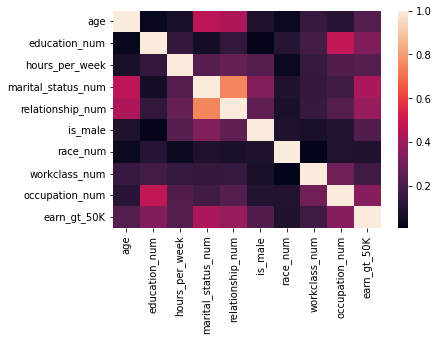

In [75]:
sns.heatmap(correlation_matrix)

#### Discussion: 
- Should we consider 'native_country' asa feature'?
- What are the concerns you have regarding the fairness in the prediction when using these features

In [76]:
numeric_colums_to_model

['age',
 'education_num',
 'hours_per_week',
 'marital_status_num',
 'relationship_num',
 'is_male',
 'race_num',
 'workclass_num',
 'occupation_num',
 'earn_gt_50K']

## 6.2 Correlation Between One-hot Encoded Features and the Target

In [77]:
correlation_matrix_one_hot = census_data_one_hot[one_hot_categorical_columns_to_model+['earn_gt_50K']].corr()
correlation_matrix_one_hot

,is_male,workclass_group_Federal-gov,workclass_group_Local-State-gov,workclass_group_Private,workclass_group_Self-emp-inc,workclass_group_Self-emp-not-inc,marital_status_group_Married-civ-AF-spouse,marital_status_group_Never-married,occupation_group_Craft-repair,occupation_group_Farming-fishing-Machine-op-inspct,...,age_group_40-50,age_group_50-60,age_group_>60,hours_per_week_group_20-35,hours_per_week_group_35-45,hours_per_week_group_45-60,hours_per_week_group_>60,education_group_school,education_group_university,earn_gt_50K
is_male,1.000000,0.007067,-0.044538,-0.035855,0.082302,0.105220,0.427793,-0.171753,0.222710,0.088554,...,0.044195,0.034750,0.008210,-0.143467,0.022560,0.165191,0.066212,0.033985,-0.021017,0.214958
workclass_group_Federal-gov,0.007067,1.000000,-0.059938,-0.262049,-0.033171,-0.051536,0.017357,-0.026679,-0.031911,-0.045340,...,0.048104,0.029043,-0.012169,-0.043509,0.067097,-0.016372,-0.013064,-0.033465,0.049887,0.061602
workclass_group_Local-State-gov,-0.044538,-0.059938,1.000000,-0.514659,-0.065146,-0.101216,0.011615,-0.035586,-0.066370,-0.083485,...,0.056257,0.030023,-0.009321,-0.021098,0.042979,-0.027887,-0.009895,-0.043127,0.111339,0.037057
workclass_group_Private,-0.035855,-0.262049,-0.514659,1.000000,-0.284819,-0.442515,-0.096681,0.099422,0.066237,0.064916,...,-0.058433,-0.068169,-0.134804,-0.005998,0.098294,-0.040463,-0.075698,0.018069,-0.097137,-0.076792
workclass_group_Self-emp-inc,0.082302,-0.033171,-0.065146,-0.284819,1.000000,-0.056014,0.110286,-0.084353,-0.015633,-0.022998,...,0.049913,0.043187,0.039537,-0.033179,-0.076965,0.111499,0.080616,-0.021280,0.052004,0.140562
workclass_group_Self-emp-not-inc,0.105220,-0.051536,-0.101216,-0.442515,-0.056014,1.000000,0.120386,-0.107484,0.073040,0.093478,...,0.039483,0.054389,0.083905,0.019681,-0.137649,0.099887,0.112501,0.017573,-0.002728,0.027914
marital_status_group_Married-civ-AF-spouse,0.427793,0.017357,0.011615,-0.096681,0.110286,0.120386,1.000000,-0.645465,0.124892,0.040049,...,0.147305,0.130458,0.075420,-0.132165,0.017526,0.153761,0.066356,0.027814,0.025614,0.446607
marital_status_group_Never-married,-0.171753,-0.026679,-0.035586,0.099422,-0.084353,-0.107484,-0.645465,1.000000,-0.093434,-0.029276,...,-0.245021,-0.213946,-0.163338,0.120446,-0.049474,-0.119625,-0.057733,-0.052305,0.029260,-0.317152
occupation_group_Craft-repair,0.222710,-0.031911,-0.066370,0.066237,-0.015633,0.073040,0.124892,-0.093434,1.000000,-0.120268,...,0.021777,0.010550,-0.047244,-0.062062,0.099221,-0.001642,-0.025336,0.031695,-0.144681,-0.010813
occupation_group_Farming-fishing-Machine-op-inspct,0.088554,-0.045340,-0.083485,0.064916,-0.022998,0.093478,0.040049,-0.029276,-0.120268,1.000000,...,-0.004489,-0.000135,0.004003,-0.044328,0.052520,-0.009911,0.045093,0.124993,-0.170892,-0.088627


<AxesSubplot:>

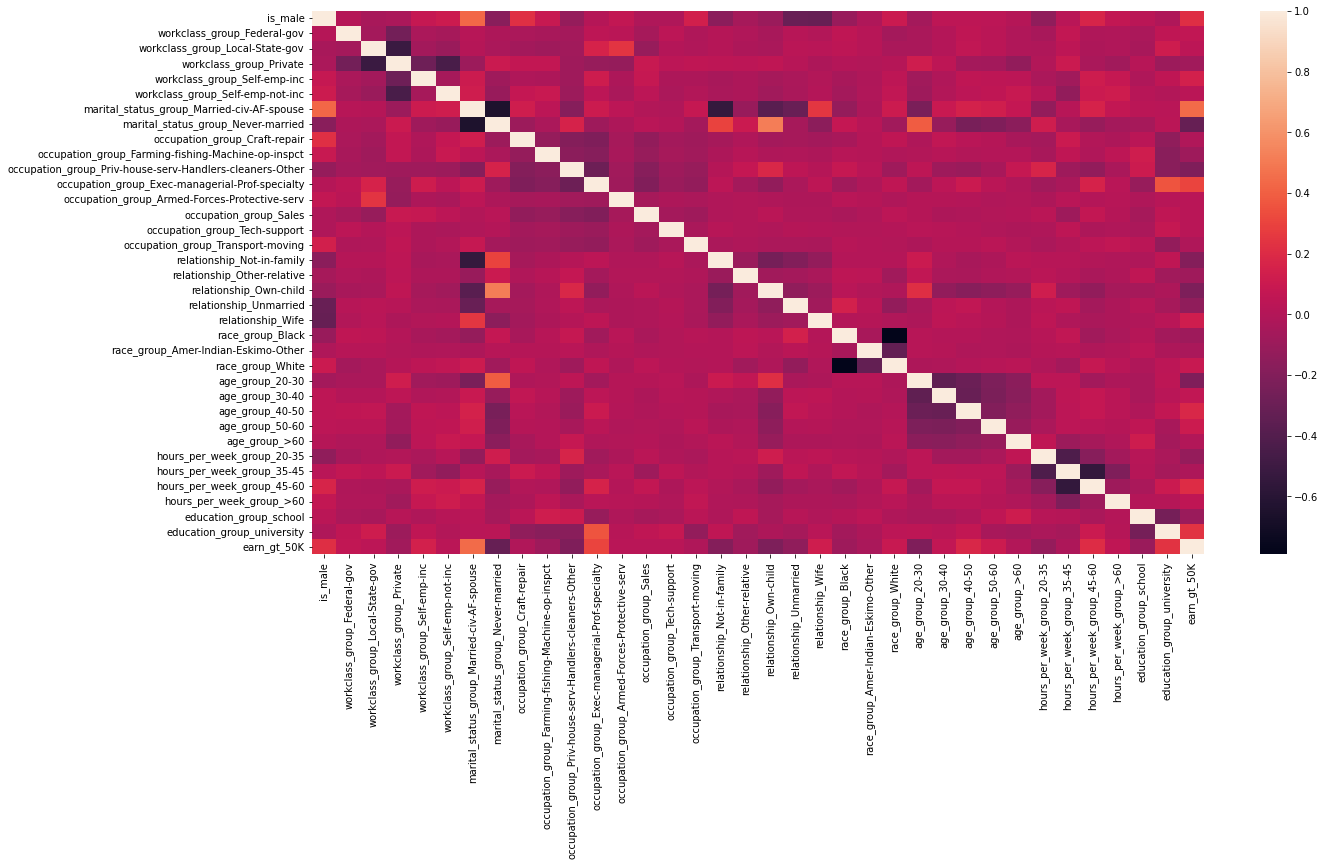

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation_matrix_one_hot)

# 7. Collect the Transformation Steps

In [79]:
# Functions
def min_max_scalar(data, column):
    max_value = data[column].max()
    min_value = data[column].min()
    data[f'{column}_scaled'] = (data[column]-min_value)/(max_value-min_value)
    return data

def z_score(data, column):
    mean = data[column].mean()
    std = data[column].std()
    data[f'{column}_zscore'] = (data[column]-mean)/std
    return data

def numeric_to_categorical(data, column, bin_edges, labels):
    data[F'{column}_group'] = pd.cut(x=data[column], bins=bin_edges, labels=labels)
    return data

def one_hot_encode(data, columns_to_keep, columns_to_one_hot):
    dummy_columns = pd.get_dummies(census_data[columns_to_one_hot], drop_first=True)
    data_one_hot = pd.concat([data[columns_to_keep], dummy_columns], axis=1)
    one_hot_columns = dummy_columns.columns
    return data_one_hot, one_hot_columns

# Pre-processing tasks

#sex
census_data['is_male'] = np.where(census_data['sex']=='Male', 1,0)

# workclass
census_data['workclass_group'] = census_data['workclass'].replace({'?':'Other', 'Without-pay':'Other', 'Never-worked':'Other', 'Local-gov':'Local-State-gov', 'State-gov':'Local-State-gov'})
census_data['workclass_num'] = census_data['workclass_group'].replace({'Other':1, 'Private':2, 'Self-emp-not-inc':3, 'Local-State-gov':4, 'Federal-gov':5, 'Self-emp-inc':6}).astype('int')

# marital_status
census_data['marital_status_group'] = census_data['marital_status'].replace({'Divorced':'Divorced-Separated-Widowed-Absent', 'Separated':'Divorced-Separated-Widowed-Absent', 'Widowed':'Divorced-Separated-Widowed-Absent', 
                                    'Married-spouse-absent':'Divorced-Separated-Widowed-Absent',
                                    'Married-civ-spouse':'Married-civ-AF-spouse', 'Married-AF-spouse':'Married-civ-AF-spouse'})
census_data['marital_status_num'] = census_data['marital_status_group'].replace({'Never-married':1, 'Divorced-Separated-Widowed-Absent':2, 'Married-civ-AF-spouse':3}).astype('int')

# occupation
census_data['occupation_group'] = census_data['occupation'].replace({'Prof-specialty':'Exec-managerial-Prof-specialty', 'Exec-managerial':'Exec-managerial-Prof-specialty', 
                                                                        'Protective-serv':'Armed-Forces-Protective-serv', 'Armed-Forces':'Armed-Forces-Protective-serv',
                                                                        'Priv-house-serv':'Priv-house-serv-Handlers-cleaners-Other', 'Handlers-cleaners':'Priv-house-serv-Handlers-cleaners-Other', 
                                                                        'Other-service':'Priv-house-serv-Handlers-cleaners-Other', '?':'Priv-house-serv-Handlers-cleaners-Other',
                                                                        'Farming-fishing':'Farming-fishing-Machine-op-inspct', 'Machine-op-inspct':'Farming-fishing-Machine-op-inspct',
                                                                        })
census_data['occupation_num'] = census_data['occupation_group'].replace({'Priv-house-serv-Handlers-cleaners-Other':1, 'Farming-fishing-Machine-op-inspct':2, 
                                                                                'Adm-clerical':3, 'Transport-moving':4,'Craft-repair':5, 'Sales':6, 'Tech-support':7,
                                                                                'Armed-Forces-Protective-serv':8, 'Exec-managerial-Prof-specialty':9}).astype('int')

# race
census_data['race_group'] = census_data['race'].replace({'Other':'Amer-Indian-Eskimo-Other', 'Amer-Indian-Eskimo':'Amer-Indian-Eskimo-Other'})
census_data['race_num'] = census_data['race_group'].replace({'Amer-Indian-Eskimo-Other':1, 'Black':2, 'White':3, 'Asian-Pac-Islander':4}).astype('int')

# relationship
census_data['relationship_num'] = census_data['relationship'].replace({'Own-child':1, 'Other-relative':2, 'Unmarried':3, 'Not-in-family':4, 'Husband':5, 'Wife':6}).astype('int')


# 8. Save Pre-Processed Data

In [80]:
# save as picke file (binary)
census_data.to_pickle('income_data_processed.pkl')

# Save as .csv
census_data.to_csv('income_data_processed.csv', index=False)

<hr>

In [81]:
# Load Data from Pickle file

#census_data = pd.read_pickle('income_data_processed.pkl')

In [82]:
census_data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,...,is_male,workclass_group,workclass_num,marital_status_group,marital_status_num,occupation_group,occupation_num,race_group,race_num,relationship_num
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,Local-State-gov,4,Never-married,1,Adm-clerical,3,White,3,4
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,Self-emp-not-inc,3,Married-civ-AF-spouse,3,Exec-managerial-Prof-specialty,9,White,3,5
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,Private,2,Divorced-Separated-Widowed-Absent,2,Priv-house-serv-Handlers-cleaners-Other,1,White,3,4
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,Private,2,Married-civ-AF-spouse,3,Priv-house-serv-Handlers-cleaners-Other,1,Black,2,5
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,Private,2,Married-civ-AF-spouse,3,Exec-managerial-Prof-specialty,9,Black,2,6


# 9. Identify Feature variables (X) and target variable (y)
* y = f(X)

In [83]:
census_data.columns

Index(['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'earn_gt_50K', 'age_group', 'hours_per_week_group',
       'age_scaled', 'age_zscore', 'education_group', 'education_group2',
       'education_group3', 'education_group4', 'is_male', 'workclass_group',
       'workclass_num', 'marital_status_group', 'marital_status_num',
       'occupation_group', 'occupation_num', 'race_group', 'race_num',
       'relationship_num'],
      dtype='object')

In [84]:
numeric_colums_to_model

['age',
 'education_num',
 'hours_per_week',
 'marital_status_num',
 'relationship_num',
 'is_male',
 'race_num',
 'workclass_num',
 'occupation_num',
 'earn_gt_50K']

In [85]:
X_columns = []
y_column =''

## 9.1 Target Variable

In [86]:
census_data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

#### Transformed into Binary Column
* "<=50K" -> 0
* ">50K"  -> 1

In [87]:
census_data['earn_gt_50K'].unique()

array([0, 1])

In [88]:
census_data['y_act'] = census_data['earn_gt_50K']

In [89]:
census_data[['class', 'y_act']].sample(5)

,class,y_act
2148,<=50K,0
25490,<=50K,0
23435,<=50K,0
16810,<=50K,0
30222,>50K,1


In [90]:
# value counts 
census_data[['class', 'y_act']].value_counts()

class  y_act
<=50K  0        31297
>50K   1         9797
dtype: int64

In [91]:
# value counts as a ratio
census_data[['class', 'y_act']].value_counts(normalize=True)

class  y_act
<=50K  0        0.761595
>50K   1        0.238405
dtype: float64

## 9.2 Features (X Variables)

### Correlation between X variables and y variable

In [92]:
correlation_matrix[['earn_gt_50K']].style.background_gradient()

,earn_gt_50K
age,0.227311
education_num,0.331170
hours_per_week,0.225930
marital_status_num,0.423020
relationship_num,0.382134
is_male,0.214958
race_num,0.089083
workclass_num,0.170475
occupation_num,0.342933
earn_gt_50K,1.000000


# 10. Build Logistic Regression Model

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [94]:
census_data.columns

Index(['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'earn_gt_50K', 'age_group', 'hours_per_week_group',
       'age_scaled', 'age_zscore', 'education_group', 'education_group2',
       'education_group3', 'education_group4', 'is_male', 'workclass_group',
       'workclass_num', 'marital_status_group', 'marital_status_num',
       'occupation_group', 'occupation_num', 'race_group', 'race_num',
       'relationship_num', 'y_act'],
      dtype='object')

## 10.1 Identify `X` and `y`

In [95]:
numeric_colums_to_model

['age',
 'education_num',
 'hours_per_week',
 'marital_status_num',
 'relationship_num',
 'is_male',
 'race_num',
 'workclass_num',
 'occupation_num',
 'earn_gt_50K']

In [96]:
X_columns = ['age', 'education_num', 'hours_per_week', 'marital_status_num', 'is_male', 'race_num', 'workclass_num', 'occupation_num'] #, 'relationship_num'
y_column = 'y_act'

In [97]:
census_data[X_columns].head()

,age,education_num,hours_per_week,marital_status_num,is_male,race_num,workclass_num,occupation_num
0,39,13,40.0,1,1,3,4,3
1,50,13,13.0,3,1,3,3,9
2,38,9,40.0,2,1,3,2,1
3,53,7,40.0,3,1,2,2,1
4,28,13,40.0,3,0,2,2,9


In [98]:
census_data[y_column].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int32

In [99]:
# Two classes
census_data[y_column].unique()

array([0, 1])

## 10.2 Train Test Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(census_data[X_columns], census_data[y_column], test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


## 10.3 Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [101]:
model = LogisticRegression()

## 10.4 Fit Model

In [102]:
model.fit(X_train, y_train)

d:\Python\python-3.9.4.amd64\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 10.5 Predict

In [103]:
model.predict_proba(X_test)

array([[0.81801288, 0.18198712],
       [0.97654951, 0.02345049],
       [0.990063  , 0.009937  ],
       ...,
       [0.94710545, 0.05289455],
       [0.7288818 , 0.2711182 ],
       [0.42331657, 0.57668343]])

### Predicted Probability for Class 1

In [104]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.18198712, 0.02345049, 0.009937  , ..., 0.05289455, 0.2711182 ,
       0.57668343])

In [105]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

## Create Results Data Frame for Test Sample

In [106]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
28285,1,0,0.463202
34979,0,0,0.009167
30376,0,0,0.007987
28275,0,0,0.199754
29005,0,0,0.003157
14300,0,0,0.046336
4336,0,0,0.005073
39148,0,0,0.081624
128,0,0,0.153524
30160,0,0,0.006563


## 11.6 Evaluate 

### Confusion Matrix

In [107]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,All
y_act,,,
0,8666,721,9387
1,1389,1553,2942
All,10055,2274,12329


In [108]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.8288587882228892

# 11. Build  Random Forest Classifier
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model = RandomForestClassifier(n_estimators=500)

In [111]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [112]:
model.predict_proba(X_test)

array([[0.83762326, 0.16237674],
       [0.986     , 0.014     ],
       [1.        , 0.        ],
       ...,
       [0.99      , 0.01      ],
       [0.2795    , 0.7205    ],
       [0.006     , 0.994     ]])

In [113]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.16237674, 0.014     , 0.        , ..., 0.01      , 0.7205    ,
       0.994     ])

In [114]:
y_pred = model.predict(X_test)

In [115]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
21807,0,0,0.328000
32689,0,0,0.000000
6384,0,0,0.000000
24688,0,0,0.078000
5754,1,0,0.481200
22913,0,0,0.000000
28914,1,1,0.771639
14493,0,0,0.024000
20398,1,1,0.875933
32990,0,1,0.718000


In [116]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,All
y_act,,,
0,8409,978,9387
1,1300,1642,2942
All,9709,2620,12329


In [117]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.8152323789439533

# 12. Build  Random Forest Classifier with One-hot Encoded Variables


In [118]:
one_hot_categorical_columns_to_model

['is_male',
 'workclass_group_Federal-gov',
 'workclass_group_Local-State-gov',
 'workclass_group_Private',
 'workclass_group_Self-emp-inc',
 'workclass_group_Self-emp-not-inc',
 'marital_status_group_Married-civ-AF-spouse',
 'marital_status_group_Never-married',
 'occupation_group_Craft-repair',
 'occupation_group_Farming-fishing-Machine-op-inspct',
 'occupation_group_Priv-house-serv-Handlers-cleaners-Other',
 'occupation_group_Exec-managerial-Prof-specialty',
 'occupation_group_Armed-Forces-Protective-serv',
 'occupation_group_Sales',
 'occupation_group_Tech-support',
 'occupation_group_Transport-moving',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_group_Black',
 'race_group_Amer-Indian-Eskimo-Other',
 'race_group_White',
 'age_group_20-30',
 'age_group_30-40',
 'age_group_40-50',
 'age_group_50-60',
 'age_group_>60',
 'hours_per_week_group_20-35',
 'hours_per_week_group_35-45',
 'ho

In [119]:
X_columns = one_hot_categorical_columns_to_model
y_column = 'earn_gt_50K'

X_train, X_test, y_train, y_test = train_test_split(census_data_one_hot[X_columns], census_data[y_column], test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


In [120]:
model = RandomForestClassifier(n_estimators=500, max_depth=20)

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
print(cm)

acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
print(acuracy)

y_pred     0     1    All
y_act                    
0       8484   903   9387
1       1311  1631   2942
All     9795  2534  12329
0.8204233920025955


<hr>
Last update 2022-11-11 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.